<a href="https://colab.research.google.com/github/swaraj0009/AI_Models/blob/master/TFT/notebooks/5_model_results_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ⚡ Quick Setup - Run after runtime reset (CPU/GPU Switch)
# Installs essential packages silently to save output clutter

!pip install dask pytz torch pytorch-forecasting pytorch-lightning \
    rich colorama matplotlib seaborn pandas numpy tensorboard \
    'lightning[extra]' pyarrow fastparquet --quiet

print("\033[92m✅ All required packages installed successfully.\033[0m")

# # Lightweight Install for Reporting Notebook
# !pip install pandas matplotlib seaborn pyarrow fastparquet rich colorama \
#   pytorch-forecasting pytorch-lightning --quiet

# print("\033[92m✅ Reporting dependencies installed successfully.\033[0m")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Setup paths and imports

In [ ]:
# Standard Library
import os
import datetime
import glob
import json
import shutil
import math
import pytz
from concurrent.futures import ThreadPoolExecutor
from pathlib import Path

# Third-Party Libraries
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

# PyTorch Lightning
# from datetime import datetime
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint

# PyTorch Forecasting
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import RMSE

ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.datetime.now(ist)
timestamp = now_ist.strftime("%Y%m%d-%H%M%S")
print(f"All Libraries are loaded : {timestamp}")

All Libraries are loaded : 20250703-200851


## Input the folder to visualise

In [ ]:
from pathlib import Path

output_base_dir = Path("/content/drive/MyDrive/output")
log_dir = Path("/content/drive/MyDrive/output/logs")

relative_output_path = "/content/drive/MyDrive/output/cpu_30VMs_past40_fut12_bs32_lr1e-02_hid10_20250703-163744/cpu_utilization_ratio_run_20250703-163744"
relative_log_path = "/content/drive/MyDrive/output/logs/cpu_30VMs_past40_fut12_bs32_lr1e-02_hid10_20250703-163744/cpu_utilization_ratio_log/version_0"

output_path = output_base_dir / relative_output_path
log_path = output_base_dir / relative_log_path

# print("full_output_path:", full_output_path, "\nfull_log_path:", full_log_path)

## Load and plot training metrics

   epoch  step  train_loss  val_loss
0      0    49    0.018815       NaN
1      0    99    0.017252       NaN
2      0   149    0.021150       NaN
3      0   199    0.013888       NaN
4      0   249    0.014233       NaN


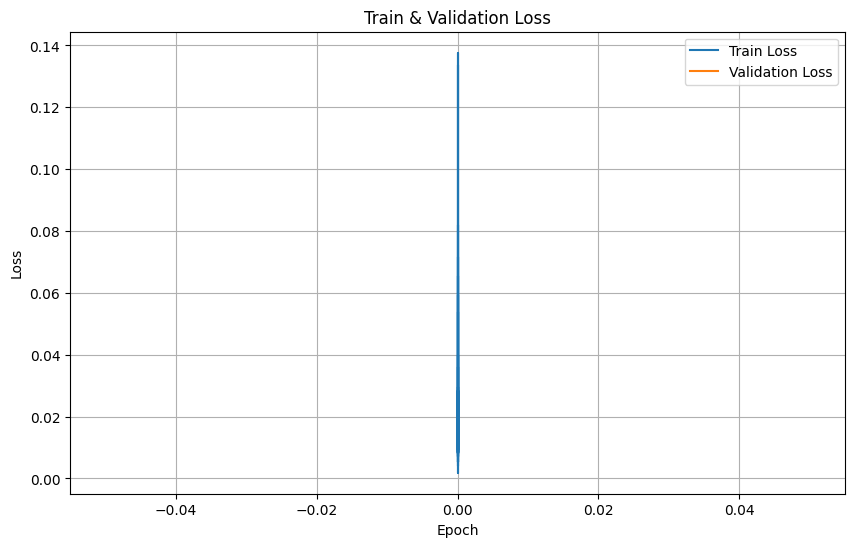

In [ ]:
metrics = pd.read_csv(os.path.join(log_path, "metrics.csv"))
print(metrics.head())

plt.figure(figsize=(10,6))
plt.plot(metrics['epoch'], metrics['train_loss'], label='Train Loss')
plt.plot(metrics['epoch'], metrics['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Load cleaned data snapshot and inspect

       Timestamp [s]      CPU cores  CPU capacity provisioned [MHZ]  \
count   2.295360e+05  229536.000000                   229536.000000   
mean    1.377613e+09       1.859495                     4896.067651   
std     7.535814e+05       1.618380                     3855.458807   
min     1.376315e+09       1.000000                     2399.999643   
25%     1.376952e+09       1.000000                     2925.999291   
50%     1.377625e+09       1.000000                     2925.999560   
75%     1.378269e+09       2.000000                     5199.998608   
max     1.378907e+09       8.000000                    19199.997144   

       CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
count    229536.000000  229536.000000                      2.295360e+05   
mean        269.958052       2.297196                      5.062828e+06   
std         861.764834       6.420805                      1.288979e+07   
min           0.000000       0.000000                      3

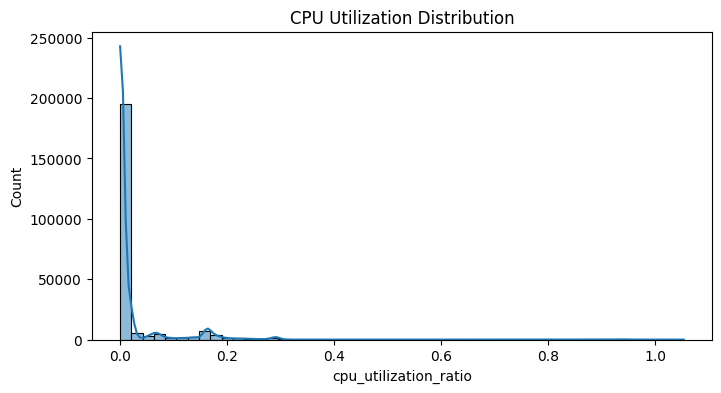

In [ ]:
df = pd.read_csv(os.path.join(output_path, "tft_df.csv"))
print(df.describe())
print(df.head())

plt.figure(figsize=(8,4))
sns.histplot(df['cpu_utilization_ratio'], bins=50, kde=True)
plt.title("CPU Utilization Distribution")
plt.show()

## Load saved dataset for inference consistency

In [ ]:
dataset = TimeSeriesDataSet.load(os.path.join(output_path, "tft_df"))
print(dataset)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/output/cpu_30VMs_past40_fut12_bs32_lr1e-02_hid10_20250703-163744/cpu_utilization_ratio_run_20250703-163744/tft_df'

## Simple tuning suggestions based on metrics

In [ ]:
def analyze_metrics(metrics_df):
    train_last = metrics_df['train_loss'].iloc[-1]
    val_last = metrics_df['val_loss'].iloc[-1]
    diff = val_last - train_last

    print(f"Last Train Loss: {train_last:.4f}")
    print(f"Last Val Loss: {val_last:.4f}")
    print(f"Difference (Val - Train): {diff:.4f}")

    if val_last > 0.5:
        print("High validation loss → try increasing model size or training longer.")
    elif diff > 0.1:
        print("Possible overfitting → try increasing dropout or early stopping patience.")
    elif train_last > 0.5:
        print("High training loss → try reducing dropout or increasing hidden size.")
    else:
        print("Training looks good. Consider lowering learning rate for fine tuning.")

analyze_metrics(metrics)

Last Train Loss: nan
Last Val Loss: 0.0960
Difference (Val - Train): nan
Training looks good. Consider lowering learning rate for fine tuning.


## Inspect checkpoint metadata

In [ ]:
import torch
ckpt_path = os.path.join(output_path, "tft-epoch=XX-val_loss=YY.ckpt")
ckpt = torch.load(ckpt_path, map_location="cpu")

print("Checkpoint keys:", ckpt.keys())
print("Epoch:", ckpt['epoch'])
print("Global step:", ckpt['global_step'])
print("Hyperparameters:", ckpt['hyper_parameters'])

In [ ]:
from pytorch_forecasting import TemporalFusionTransformer

# Load model from checkpoint
model = TemporalFusionTransformer.load_from_checkpoint("/path/to/last.ckpt")

# Generate forecast
predictions = model.predict(your_timeseries_data)

# Save forecast for UI
predictions.to_csv("/content/drive/MyDrive/InfraForecast/vm_001_forecast.csv")
